# Time-Series Forecasting Workflow

This notebook covers forecasting parcel delivery volume using time-series models:


1. Import Required Libraries
2. Load and Prepare Dataset
3. Aggregate Data by Date
4. Train Prophet Model
5. Visualize Forecasts
6. Save Forecasting Model


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import joblib

Importing plotly failed. Interactive plots will not work.


In [2]:
# Load and Prepare Dataset
import sys, os
sys.path.append(os.path.abspath("../src"))
from data_loader import load_delivery_data
df = load_delivery_data()
df['receipt_time'] = pd.to_datetime(df['receipt_time'], format='%m-%d %H:%M:%S')

In [3]:
# Aggregate Data by Date
df['date'] = df['receipt_time'].dt.date
daily_counts = df.groupby('date').size().reset_index(name='count')
daily_counts.columns = ['ds', 'y']
daily_counts.head()

,ds,y
0,1900-03-18,31390
1,1900-03-19,31878
2,1900-03-20,31804
3,1900-03-21,32529
4,1900-03-22,32582


In [4]:
# Train Prophet Model
model = Prophet()
model.fit(daily_counts)

12:20:15 - cmdstanpy - INFO - Chain [1] start processing
12:20:15 - cmdstanpy - INFO - Chain [1] done processing
12:20:15 - cmdstanpy - INFO - Chain [1] done processing


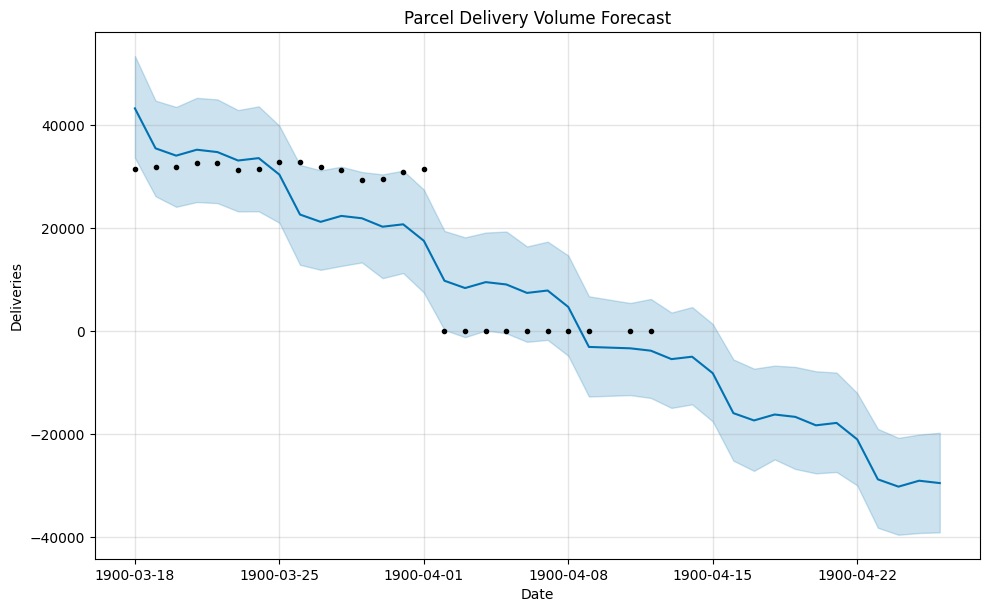

In [5]:
# Visualize Forecasts
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Parcel Delivery Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Deliveries')
plt.show()

In [6]:
# Save the trained Prophet model
joblib.dump(model, '../src/prophet_forecasting_model.pkl')
print('Prophet forecasting model saved to ../src/prophet_forecasting_model.pkl')

Prophet forecasting model saved to ../src/prophet_forecasting_model.pkl
